In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# file name
file = '/content/drive/My Drive/Colab Notebooks/Kaggle/steam/steam-200k.csv'

In [3]:
data = pd.read_csv(file,header=None,index_col=False,names=["UserID", "GameName", "Behavior", "Value"])
data.head(5)

,UserID,GameName,Behavior,Value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
print('Number of observations: ',len(data),'. Number of Columns: ',len(data.columns))
data.isnull().sum().max() # Which means that no missing values in all columns

Number of observations:  200000 . Number of Columns:  4


0

In [6]:
print('Unique Behaviors: ',data.Behavior.unique())
print('Number of unique users: ',len(data.UserID.unique()))
print('Number of unique games: ',len(data.GameName.unique()))

Unique Behaviors:  ['purchase' 'play']
Number of unique users:  12393
Number of unique games:  5155


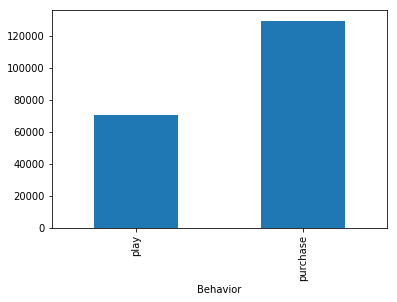

In [29]:
behave_counts = data.groupby('Behavior')['Behavior'].agg('count')
behave_counts.plot.bar()

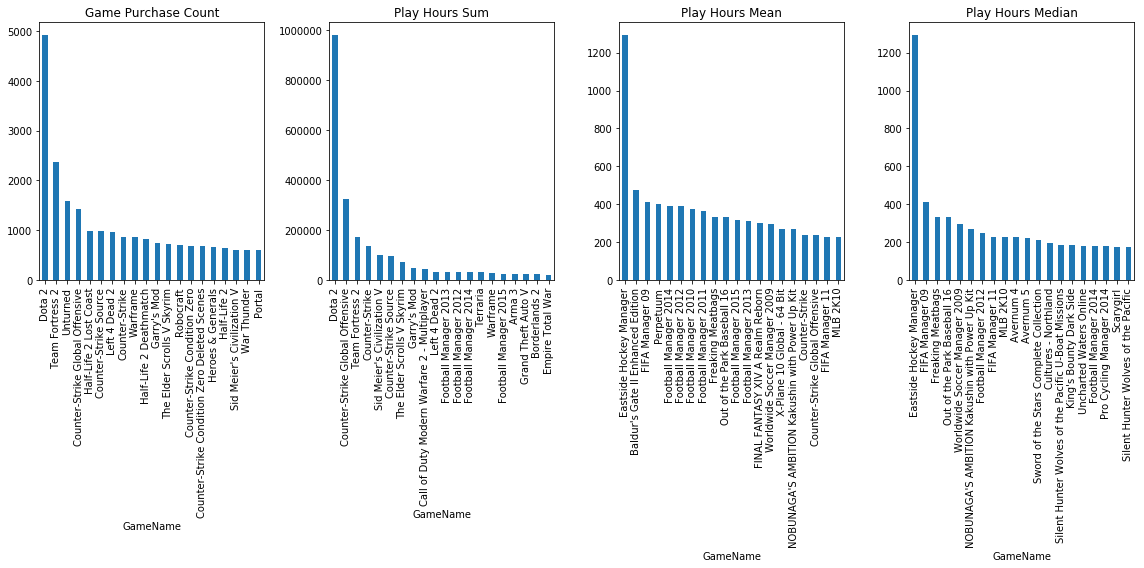

In [35]:
game_purchase_counts = data.loc[data.Value==1].groupby('GameName')['GameName'].agg('count').sort_values(ascending=False)
game_hours_sum = data.loc[data.Value!=1].groupby('GameName')['Value'].agg(np.sum).sort_values(ascending=False)
game_hours_mean = data.loc[data.Value!=1].groupby('GameName')['Value'].agg(np.mean).sort_values(ascending=False)
game_hours_median = data.loc[data.Value!=1].groupby('GameName')['Value'].agg(np.median).sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16,8))
game_purchase_counts[0:20].plot.bar(ax=axes[0])
axes[0].title.set_text('Game Purchase Count')
game_hours_sum[0:20].plot.bar(ax=axes[1])
axes[1].title.set_text('Play Hours Sum')
game_hours_mean[0:20].plot.bar(ax=axes[2])
axes[2].title.set_text('Play Hours Mean')
game_hours_median[0:20].plot.bar(ax=axes[3])
axes[3].title.set_text('Play Hours Median')
fig.tight_layout()